Final Project

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('/Users/silvanacardoza/Downloads/df_Georgia.csv')

In [5]:
df_filtered = df.drop(columns=[
    'MONTHS_OF_SUPPLY', 'MONTHS_OF_SUPPLY_MOM', 'MONTHS_OF_SUPPLY_YOY',
    'PRICE_DROPS', 'PRICE_DROPS_MOM', 'PRICE_DROPS_YOY'
])

# Drop rows with missing target
df_filtered = df_filtered.dropna(subset=['MEDIAN_SALE_PRICE'])

# Select features (numerical + categorical)
features = [
    'MEDIAN_LIST_PRICE', 'MEDIAN_PPSF', 'HOMES_SOLD',
    'INVENTORY', 'MEDIAN_DOM', 'AVG_SALE_TO_LIST', 'SOLD_ABOVE_LIST',
    'OFF_MARKET_IN_TWO_WEEKS', 'PROPERTY_TYPE', 'CITY'
]
target = 'MEDIAN_SALE_PRICE'

# Drop rows with missing feature values
model_data = df_filtered[features + [target]].dropna()

# Split into features (X) and target (y)
X = model_data[features]
y = model_data[target]

# Identify categorical and numerical features
categorical_features = ['PROPERTY_TYPE', 'CITY']
numerical_features = list(set(features) - set(categorical_features))

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create the full modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R² Score: {r2:.3f}")

Root Mean Squared Error (RMSE): $108,418.06
R² Score: 0.747


In [9]:
print(df.head())

  PERIOD_BEGIN  PERIOD_END  PERIOD_DURATION REGION_TYPE  REGION_TYPE_ID  \
0   2020-09-01  2020-11-30               90    zip code               2   
1   2017-07-01  2017-09-30               90    zip code               2   
2   2018-08-01  2018-10-31               90    zip code               2   
3   2018-03-01  2018-05-31               90    zip code               2   
4   2018-09-01  2018-11-30               90    zip code               2   

   TABLE_ID  IS_SEASONALLY_ADJUSTED  REGION         CITY    STATE  ...  \
0     12741                   False   30504  Gainesville  Georgia  ...   
1     16947                   False   39815   Attapulgus  Georgia  ...   
2     13026                   False   31097   Yatesville  Georgia  ...   
3     12554                   False   30228      Hampton  Georgia  ...   
4     12522                   False   30170    Roopville  Georgia  ...   

  SOLD_ABOVE_LIST_YOY PRICE_DROPS  PRICE_DROPS_MOM  PRICE_DROPS_YOY  \
0            0.065152         NaN

In [11]:
df.describe()

,PERIOD_DURATION,REGION_TYPE_ID,TABLE_ID,REGION,PROPERTY_TYPE_ID,MEDIAN_SALE_PRICE,MEDIAN_SALE_PRICE_MOM,MEDIAN_SALE_PRICE_YOY,MEDIAN_LIST_PRICE,MEDIAN_LIST_PRICE_MOM,...,SOLD_ABOVE_LIST,SOLD_ABOVE_LIST_MOM,SOLD_ABOVE_LIST_YOY,PRICE_DROPS,PRICE_DROPS_MOM,PRICE_DROPS_YOY,OFF_MARKET_IN_TWO_WEEKS,OFF_MARKET_IN_TWO_WEEKS_MOM,OFF_MARKET_IN_TWO_WEEKS_YOY,PARENT_METRO_REGION_METRO_CODE
count,195589.0,195589.0,195589.000000,195589.000000,195589.000000,1.955890e+05,187720.000000,174015.000000,1.838360e+05,175730.000000,...,195589.000000,187720.000000,174015.000000,0.0,0.0,0.0,191864.000000,183783.000000,170765.000000,195589.000000
mean,90.0,2.0,12763.799396,30667.261390,4.174488,2.297098e+05,0.039963,0.582546,2.526579e+05,0.046228,...,0.204942,-0.000019,0.002517,NaN,NaN,NaN,0.248548,-0.000555,0.018064,19828.713169
std,0.0,0.0,496.986905,1064.488216,4.645024,2.127884e+05,0.787898,148.634500,2.520915e+05,1.299048,...,0.214368,0.125714,0.243305,NaN,NaN,NaN,0.246646,0.124306,0.221007,12265.406654
min,90.0,2.0,12372.000000,30002.000000,-1.000000,5.500000e+02,-0.993374,-0.998129,6.750000e+02,-0.996833,...,0.000000,-1.000000,-1.000000,NaN,NaN,NaN,0.000000,-1.000000,-1.000000,10500.000000
25%,90.0,2.0,12492.000000,30134.000000,-1.000000,1.200000e+05,-0.025641,-0.017045,1.350000e+05,-0.030644,...,0.000000,-0.023768,-0.076923,NaN,NaN,NaN,0.000000,-0.023271,-0.051606,12060.000000
50%,90.0,2.0,12629.000000,30326.000000,4.000000,1.884000e+05,0.000000,0.096776,2.069000e+05,0.000000,...,0.166667,0.000000,0.000000,NaN,NaN,NaN,0.214286,0.000000,0.000000,12060.000000
75%,90.0,2.0,12969.000000,31033.000000,6.000000,2.894500e+05,0.043830,0.256624,3.100000e+05,0.047619,...,0.285714,0.023810,0.085714,NaN,NaN,NaN,0.396343,0.024051,0.094614,25980.000000
max,90.0,2.0,16976.000000,39877.000000,13.000000,8.100000e+06,212.793103,61999.000000,1.525000e+07,213.285714,...,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,48180.000000


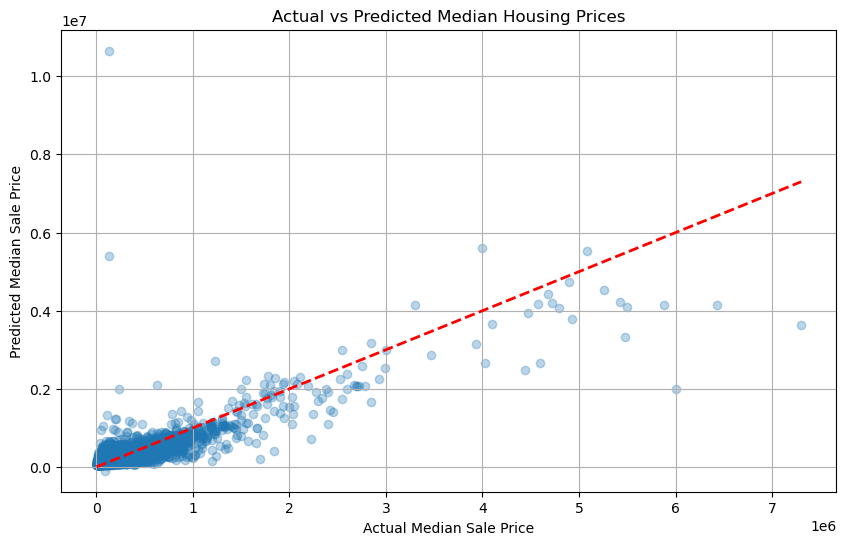

In [7]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median Sale Price")
plt.ylabel("Predicted Median Sale Price")
plt.title("Actual vs Predicted Median Housing Prices")
plt.grid(True)
plt.show()

# This plot helps you visually assess how well model is performing 
# most of the points should lie near the red dashed line.